### Udemy Hadelin & Kerill

<b>[1. Logistic Regression](#1)<br></b>
    
<b>[2. K-Nearest Neighbors (KNN)](#2)<br></b>
    2.1 KNN with Sklearn<br>
    2.2 KNN with Python (Bernd Klein)<br>
    
<b>[3. Support Vector Machines (Linear)](#3)<br></b>
    
<b>[4. Kernel SVM (Non Linear)](#4)<br></b>

<b>[5. Naive Bayes](#5)<br></b>

<b>[6. Decision Trees](#6)<br></b>

<b>[7. Random Forests](#7)<br></b>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### <a id=1> 1. Logistic Regression

In [14]:
# 1) Import the data
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# 2) Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# 3) Feature Scaling
# not required for logitsic regression but applying it will improve the model performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4) Training the logistic regression model on the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

# 5) Predicting new results
y_pred = classifier.predict(sc.transform([[30,87000]]))

# 6) Predicting the test set results
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# 7) Making the confusion matrix and finding the accuracy
cm = confusion_matrix(y_test,y_pred)
print(cm)

A = accuracy_score(y_test,y_pred)
print(A)

# 8) Visualising the training set results

[[65  3]
 [ 8 24]]
0.89


C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


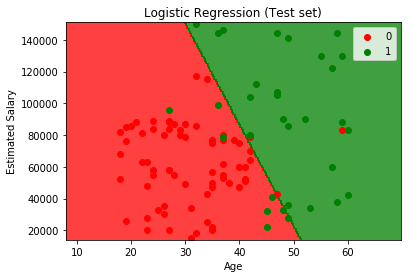

In [27]:
# 9) Visualising the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# The prediction boundary is a line cuz the Logistic Regression model is a linear model

#### Logistic Regression Case Study (Breast Cancer)

Data for practicing:

https://archive.ics.uci.edu/ml/index.php
    

In [12]:
# 1) Importing the dataset 
dataset = pd.read_csv("breast_cancer.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

# 2) Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

# 3) Building the Logistic Regression Model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

# 4) Predicting y_test
y_pred = classifier.predict(X_test)

# 5) How good are the results ?

# confusion matrix:
cf = confusion_matrix(y_test,y_pred)
print(cf)

# accuracy score
A = accuracy_score(y_test,y_pred)
print("Accuracy Score: {:.2f} %\n".format(A))

# Accuracy with k-fold Cross Validation = building 10 sets and creating 10 accuracies and averaging those
accuracies = cross_val_score(classifier,X_train,y_train,cv=10)
print("K-folds Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[84  3]
 [ 4 46]]
Accuracy Score: 0.95 %

K-folds Accuracy: 96.70 %
Standard Deviation: 2.43 %


C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

### <a id=2> 2. K-Nearest Neighbors (KNN)</a>
    
#### 2.1 KNN with Sklearn

In [23]:
# 1) Import the datasset
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# 2) Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# 3) Feature Scaling
# not required but applying it will improve the model performance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4) Building the KNN Model
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,y_train)

# 5) Predicting y_test
y_pred = classifier.predict(X_test)

# 6) How good are the results ?

# confusion matrix:
cf = confusion_matrix(y_test,y_pred)
print(cf)

# accuracy score
A = accuracy_score(y_test,y_pred)
print("Accuracy Score: {:.2f} %\n".format(A))

[[64  4]
 [ 3 29]]
Accuracy Score: 0.93 %



C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


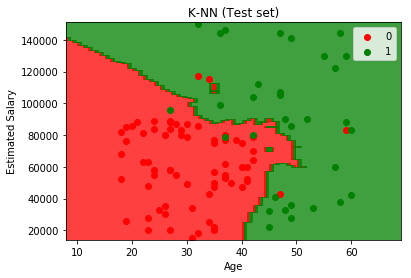

In [24]:
# 7) Visualising the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### 2.2 KNN with Python (Bernd Klein)

"show me who your friends are and I'll tell you who you are"

In [ ]:
# We create the KNN algorithm using python
# we create a function for the euclidean distance
def distance(instance1,instance2):
    # just in case the instances are lists or tuples:
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    # return the euclidean norm of the difference between the 2 instances/vectors
    return np.linalg.norm(instance1-instance2)


# we create a function that returns a list of 'k' neighbors:
def get_neighbors(X_train,y_train,test_instance,k):
    """
    returns k nearest neighbors in the form of tuples (index,dist,class)
    """
    distances = []
    for i in range(len(X_train)):
        dist = distance(test_instance,X_train[i])
        distances.append((i,dist,y_train[i]))
        # sort according to the distance 
        # apprently this is the classic way to sort a list of tuples according to a certain component
    distances.sort(key=lambda x:x[1])
    neighbors = distances[:k]
    return neighbors


# Voting to get a single result
from collections import Counter

def vote(neighbors):
    counter = Counter()
    for neighbor in neighbors:
        counter[neighbor[2]] += 1
    return counter.most_common(1)[0][0]


# measure the accuracy of the algorithm:
def measure_accuracy(y_pred,y_test):
    a = (y_pred == y_test)
    return np.sum(a)/len(y_pred)*100

In [ ]:
# IMPLEMENTATION
# Predict results from the algorithm
y_pred = np.zeros(y_test.shape)

for i in range(len(X_test)):
    neighbors = get_neighbors(X_train,y_train,X_test[i],5)
    y_pred[i] = vote(neighbors)

# Show the accuracy of the algorithm
accuracy = measure_accuracy(y_pred,y_test)
print('Accuracy: {:.2f}%'.format(accuracy))

# Show y_pred and y_test:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

### <a id=3> 3. Support Vector Machines (SVM)(Linear)

In [34]:
# 1) Importing the dataset 
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 2) Splitting the dataset
# specify that we want a linear kernel
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

# 3) Feature Scaling
# Necessart for Support Vector
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4) Building the Logistic Regression Model
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

# 5) Predicting y_test
y_pred = classifier.predict(X_test)

# 6) How good are the results ?

# confusion matrix:
cm = confusion_matrix(y_test,y_pred)
print(cm)

# accuracy score
A = accuracy_score(y_test,y_pred)
print("Accuracy Score: {:.2f} %\n".format(A))

[[66  2]
 [ 8 24]]
Accuracy Score: 0.90 %



C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


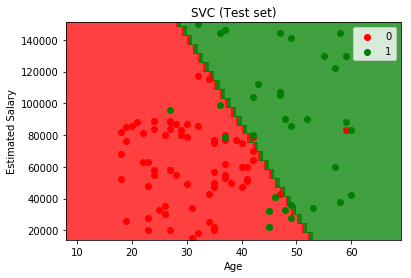

In [35]:
# 7) Visualising the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

### <a id=4> 4. Kernel SVM (Non Linear)

In [36]:
# 1) Importing the dataset 
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 2) Splitting the dataset
# specify that we want a linear kernel
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

# 3) Feature Scaling
# Necessart for Support Vector
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4) Building the Logistic Regression Model
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

# 5) Predicting y_test
y_pred = classifier.predict(X_test)

# 6) How good are the results ?

# confusion matrix:
cm = confusion_matrix(y_test,y_pred)
print(cm)

# accuracy score
A = accuracy_score(y_test,y_pred)
print("Accuracy Score: {:.2f} %\n".format(A))

[[64  4]
 [ 3 29]]
Accuracy Score: 0.93 %



C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


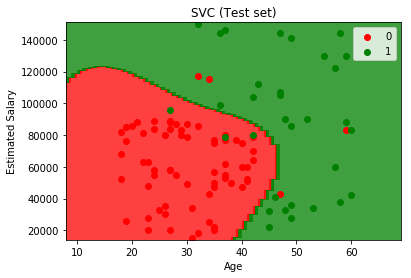

In [37]:
# 7) Visualising the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

### <a id =5> 5. Naive Bayes

In [6]:
# 1) Importing the dataset 
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 2) Splitting the dataset
# specify that we want a linear kernel
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

# 3) Feature Scaling
# It seems that it doesn't change anything here
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4) Building the Logistic Regression Model
classifier = GaussianNB()
classifier.fit(X_train,y_train)

# 5) Predicting y_test
y_pred = classifier.predict(X_test)

# 6) How good are the results ?

# confusion matrix:
cm = confusion_matrix(y_test,y_pred)
print(cm)

# accuracy score
A = accuracy_score(y_test,y_pred)
print("Accuracy Score: {:.2f} %\n".format(A))

[[65  3]
 [ 7 25]]
Accuracy Score: 0.90 %



C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


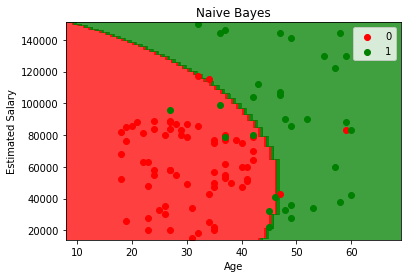

In [7]:
# 7) Visualising the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

### <a id=6> 6. Decision Trees </a>

<u>Source: Machine Learning With Random Forests And Decision Trees A Visual Guide For Beginners by Scott Hartshorn</u>

#### How does a decision tree pick its splits?

At each step, the decision tree picks the split that maximizes the information gain. The most commonly used criterias are either the “Gini” criteria, or the “Entropy” criteria. The equations are similar, but a little different. They tend to give results that are only a few percent different. In Python, the default is the “Gini” criteria.

$Gini = 1-\sum_{j}p_{j}^{2}$

where p is the probability of having datapoint j in the branch. The goal is to minimize Gini = 1 (meaning p = 1: the branch has the same elements)

For instance, let’s say that you have a branch that has 10 Apples, 6 Bananas, and 4 Coconuts. The probability of each class is 0.5, 0.3 and 0.2. so Gini = 1 - 0.5² + 0.3² + 0.2². If we have to split this branch into 2 branches. And the possible splits are:

- split1: 1st branch (10 apples, 5 bananas)  /  2nd branch (1 banana, 4 coconuts)
- split2: 1st branch (10 apples, 6 bananas, 1 coconut) /  2nd branch (3 coconuts)

We calculate the weighted Gini of each split Ex: Gini_split1 = (15 x Gini_branch1 + 5 x Gini_branch2) / 20. We choose split1 because it has the smallest Gini 0.41

$Entropy = \sum_{j}-p_{j}*log_{2}(p_{j})$


In [15]:
# 1) Importing the dataset 
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 2) Splitting the dataset
# specify that we want a linear kernel
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

# 3) Feature Scaling
# We're not supposed to apply it in the regressor so why are we applying it in the classifier ??
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4) Building the Logistic Regression Model
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

# 5) Predicting y_test
y_pred = classifier.predict(X_test)

# 6) How good are the results ?

# confusion matrix:
cm = confusion_matrix(y_test,y_pred)
print(cm)

# accuracy score
A = accuracy_score(y_test,y_pred)
print("Accuracy Score: {:.2f} %\n".format(A))

[[62  6]
 [ 3 29]]
Accuracy Score: 0.91 %



C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


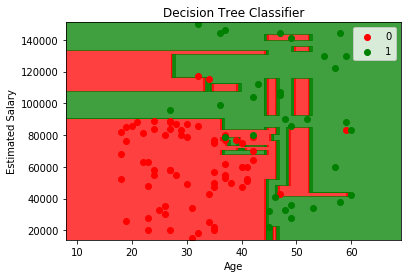

In [16]:
# 7) Visualising the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

###  <a id=7>  7. Random Forests </a>

Decision Trees break our data into splits without smoothing out anomalies leading to overfitting. Random Forests attempt to fix that problem by using multiple trees and averaging the results.

Results can be shown in 2 different ways:
- a single array with 1 most voted category: <i>predict()</i>
- an array with the weightings for all different categories: <i>predict_proba()</i>

Ways to limit overfitting:

1. limiting splits:  <i>max_depth</i>   


2. Only split a branch of the decision tree if there are a certain numbers of data points on it. Without doing so, if we had a branch that had one apple, and one orange, the decision tree would split that into two branches. However we might decide that if we don’t have at least 6 pieces of data on a branch, then we shouldn’t split because we might be overfitting.
>- Only split a branch if there are at least 6 nodes in it: <i>min_samples_split = 6</i>
>- Only split the branch if both children will have at least 3 nodes on them: <i>min_samples_leaf = 3</i>
>- Only keep the best 20 leafs: <i>max_leaf_nodes = 20</i>

#### Bootstrapping
When generating each tree, that tree has a unique set of data. That set is generated from a random subset of all of the available data, with replacement. This technique is known as bootstrapping. Each of the trees uses a set of data that is the same size of the original data set.

#### Criteria selection
For a given feature which location should the tree be split on? The split will be done at the location which maximizes the information gain on the tree. 
But if all trees in a random forest looked at the same features, we'll end up with similar trees. So at any given branch in each decision tree, only a subset of features are available for it to classify on.

#### How many trees in a random forest?
The decision on how many trees to have in the Random Forest becomes a tradeoff dependent on your problem and your computing resources. Going from 10 trees to 50 trees might improve your results significantly, and not add very much time. Going from 1,000 trees to 50,000 trees might add substantial time without improving your results very much. A good plan is to start with a small amount of trees, and scale up that number using your cross validation results to determine when the benefit is no longer worth the additional runtime. Using 100 trees in the Random Forest is a good place to start. To save time, tune the other parameters first and save increasing the number of trees til the end.

#### Out of Bag Error (OOB)
The way Random Forests work inherently set aside some of the data. When each tree is generated, due to bootstrapping It uses on average, only 63.2% of the data set. So the remaining 36.8% is set aside. The data that is not being used for any given tree is known as “Out of Bag” for that tree. Since any given tree has out of bag data, we can use that data to check the quality of each tree. The average error over all the trees will be our out of bag error.

Why is it important?
> <i>The study of error estimates for bagged classifiers in Breiman [1996b], gives empirical evidence to show that the out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.</i>

https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

#### Limitations of Random Forests: Extrapolation problem 
(Regression) When using a Random Forest Regressor, the predicted values are never outside the training set values for the target variable. For example that if we have data points that show earnings based on hours worked<br>

1 Hour you earn 10 dollars<br>
2 Hours you earn 20 dollars <br>
3 Hours you earn 30 dollars  <br>

If we use the random forest classifier algorithm to estimate how much we will earn after 10 hours, we will not get the 100 dollars we expect. It will probably give 30 dollars based on where it places the threshold.

#### Tips
- Set the random seed before generating your Random Forest so that you get reproducible results each time
- Investigate limiting branching either by Number of splits, Number of data points in a branch to split or Number of data points in the final resulting leaves
- Investigate looking at different numbers of features for each split to find optimum. The default is the square root of the number of features

In [22]:
# 1) Importing the dataset 
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# 2) Splitting the dataset
# specify that we want a linear kernel
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

# 3) Feature Scaling
# We're not supposed to apply it in the regressor so why are we applying it in the classifier ??
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4) Building the Logistic Regression Model
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

# 5) Predicting y_test
y_pred = classifier.predict(X_test)

# 6) How good are the results ?

# confusion matrix:
cm = confusion_matrix(y_test,y_pred)
print(cm)

# accuracy score
A = accuracy_score(y_test,y_pred)
print("Accuracy Score: {:.2f} %\n".format(A))

[[63  5]
 [ 4 28]]
Accuracy Score: 0.91 %



C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\oc3683\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


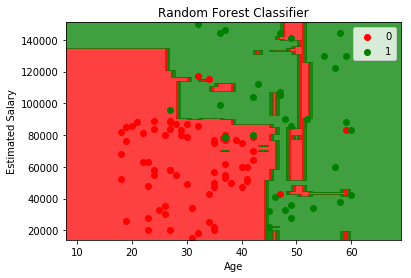

In [19]:
# 7) Visualising the test set results

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()